# **Python Setup**

**Dependencies**

In [ ]:
# Import Packages

# Image Plotting Packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Math Packages
import numpy as np
import cv2

# File System Packages
import os
from google.colab import files

# Color Picker widget
import ipywidgets as widgets

**Function Setup**

In [ ]:
# Displays an image, converts BGR to RGB
def display_img(a, title = "Original"):
    a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    plt.imshow(a), plt.title(title)
    plt.show()

# Displays an RGB image
def display_img_rgb(a, title = "Original"):
    plt.imshow(a), plt.title(title)
    plt.show()

def demo_load():
  uploaded = files.upload()

  files_list = []
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    files_list.append(fn)
    
  for filename in files_list:
    temp_img = cv2.imread(filename)
    display_img(temp_img)

# Play around with RGB
def demo_color():
  rgb_demo = widgets.ColorPicker(
    concise=True,
    description='Pick a color',
    value='#0000',
    disabled=False
  )

  display(rgb_demo)

# Rotates the image
def rotate_img(rot, angle, scale, pt_y, pt_x): 
  pt_y = int(pt_y)
  pt_x = int(pt_x)

  rows = int(len(rot) * scale)
  cols = int(len(rot[0]) * scale)

  # rotation - get proper rc length for output?
  M = cv2.getRotationMatrix2D((pt_x,pt_y),angle,scale)
  dst = cv2.warpAffine(rot,M,(cols,rows))
  return dst

# Creates list of images for scrapbooking
def list(x):
  global selected_img
  selected_img = scrapbook_imgs[scrapbook.value].copy()
  display_img(scrapbook_imgs[scrapbook.value], title=x)

# Pastes together an image and the canvas
def glue_img(pin_x, pin_y, pin_img, canvas):
  canvas[pin_y:(pin_y + len(pin_img)), pin_x:(pin_x + len(pin_img[0]))] = pin_img
  return canvas

# Pastes the scrap onto the canvas
def paste_scrap(b):
  # Display the message within the output widget.
  with paste_output:
    global canvas
    canvas = glue_img(pin_x.value, pin_y.value, selected_scrap, canvas)
    print("Img Pasted", pin_x.value, pin_y.value)

# Cropped and rotated image list
def scrap_list(x):
  global selected_scrap
  print(scrap_dropdown.value)
  try:
    selected_scrap = cropped_imgs[scrap_dropdown.value].copy()
    display_img(cropped_imgs[scrap_dropdown.value], title=x)
  except KeyError as e:
    print('\nYou haven\'t added any scraps to the list!\n')
    raise KeyError

def add_scrap(b):
  # Display the message within the output widget.
  with output:
    cropped_list.append(scrapbook.value)
    cropped_imgs[scrapbook.value] = selected_crop
    print("Scrap Added")

**Global Variables**

In [ ]:
# List of target image names
scrapbook_list = []
# Dict of names and arrays
scrapbook_imgs = {}

# image to be cropped
selected_img = np.array([0])

# image to be pasted
selected_scrap = np.array([0])

# crop images
cropped_list = []
# Dict of names and arrays
cropped_imgs = {}

# Adds the cropped image to the scrapbooking list
button = widgets.Button(description="Add to Scrapbook")
output = widgets.Output()
button.on_click(add_scrap)

# Scrapbooking coordinates
pin_x = widgets.IntText(
    value=0,
    description='X:',
    disabled=False
)
pin_y = widgets.IntText(
    value=0,
    description='Y:',
    disabled=False
)

# Initialize the pasting button
paste_button = widgets.Button(description="Add to Page")
paste_output = widgets.Output()
paste_button.on_click(paste_scrap)

# Scrapbooking Canvas
canvas = np.zeros((250,250,3), np.uint8)

# **What is an Image?**

An image is a square grid of numbers. A super simplistic example would be a 2x2 grid, with 0 representing white and 1 representing black. 

<img src='https://drive.google.com/uc?id=1Hb_zp4YqhZOZIaL3AnvpYBuR-bDS8cEh' height='300'>

The numbers in between 0 and 1 would represent every single gray value! <br>
For images in full color, the computer instead stores 3 values at each of these points. These are the Red, Green and Blue values, with a range of 0-255. 

In [ ]:
demo_color()

ColorPicker(value='#0000', concise=True, description='Pick a color')

# **Loading Images in Google Colab**

Let's try it out! This function will take in your image, and then display it for you. It also will work if you input more than one image!

Saving knight.png to knight.png
User uploaded file "knight.png" with length 5475 bytes


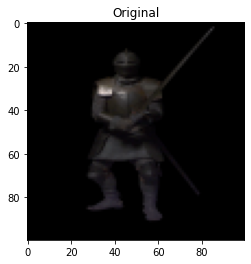

In [ ]:
demo_load()

Let's look at the pieces of function to try to make it on your own! First, we need to talk about how Colab stores data. If you look at the left-hand side of the window, you'll see a hamburger button. Click on that if that to begin with! It'll either display <font color='red'>Table of Contents</font>, or <font color='red'>Files</font>. If it doesn't say files, please click on the folder icon, below the hamburger!

If you are connected to a runtime, this wil show something like this.

This displays the current directory you are looking at! This starting one will always be the <font color='red'>/content/</font> directory. While this is actually in another folder, we won't worry about that for now!

<img src='https://drive.google.com/uc?id=105ApjI3IP_duTUi3NzS2FvWafyqJi2Rc' height='300'>

You can actually just drag and drop files into this area in order to load the file into Colab's computer!

Now that you have loaded your image into the computer's memory, let's try to display it.

<font color='blue'>
Arguments: <br>
> a - the image array <br>
> title - option argument of the image title <br>

display_img(a, title = "Original") <br>
</font>

Don't forget to load the image into the program's memory! Right now it is just being held in the file system. 



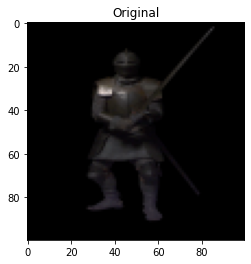

In [ ]:
test_img = cv2.imread('knight.png')
display_img(test_img)

# **Saving Images in Google Colab**

Saving an image in Google Colab is a lot easier than loading one in. There are two ways to load one! As before, you can do it from the left-hand side sidebar, just right click on the file and select save. 

However, as before, there is a way to do this through code. 

If the input of this function is a string, what would be a possible input for this function in order to download your image?

In [ ]:
files.download('knight.png') 

# **Dimensions and Axes**



In Python, the top left corner of the image is the [0,0]  point. The bottom right of the image will be the [y, x] point. In Python, the y dimension of the image, or the number of rows goes before the number of columns.

# **Cropping an Image**

Now that we know that an image is just a grid of filled in squares, how does one crop an image? By reducing the size of the grid! Let's try printing out the dimensions of the image.

In [ ]:
print(len(test_img), len(test_img[0]))

100 100


Now let's try cropping the image. Python lets us do this to lists and arrays by changing the numbers in the square brackets - but be careful about not going out of bounds!

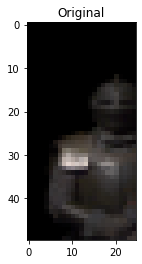

In [ ]:
crop = test_img[0:50, 25:50] # Edit this!
display_img(crop) 

# **Rotate an Image**

Rotating an image occurs by matrix multiplication! There are 4 inputs that you need - the original image, the angle in degrees to rotate by, the scale of the output (on a range of 0-1), and the point to rotate around!

The default point here is the center-point of the image, but you can try changing any of these variables to figure out what happens. 

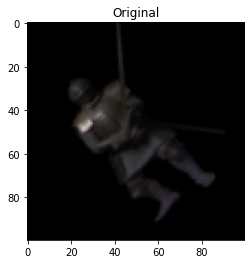

In [ ]:
rows = len(test_img)
cols = len(test_img[0])
rotated = rotate_img(test_img, 45, 1, rows/2, cols/2)
display_img(rotated)

# **Cumulative Activity**

First, lets upload the set of images that you want to modify. 

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}"'.format(
      name=fn))
  scrapbook_list.append(fn)
  scrapbook_imgs[fn] = cv2.imread(fn)

Saving knight.png to knight (2).png
Saving knight_fighting_000.png to knight_fighting_000 (1).png
Saving knight_fighting_001.png to knight_fighting_001 (1).png
Saving knight_fighting_014.png to knight_fighting_014.png
User uploaded file "knight.png"
User uploaded file "knight_fighting_000.png"
User uploaded file "knight_fighting_001.png"
User uploaded file "knight_fighting_014.png"


Here, we can view all the images that you uploaded!

In [ ]:
# List of the cropped and rotated images
scrapbook = widgets.Dropdown(
  options=scrapbook_list,
  description='Scrapbook',
  disabled=False,
)

widgets.interact(list, x=scrapbook)

interactive(children=(Dropdown(description='Scrapbook', options=('knight.png', 'knight_fighting_000.png', 'kni…

<function __main__.list>

Let's crop the image that you selected! The rows and columns are displayed below. If you want to crop another image, go back and rerun [#] and [#]!

In [ ]:
print(len(selected_img), len(selected_img[0]))

100 100


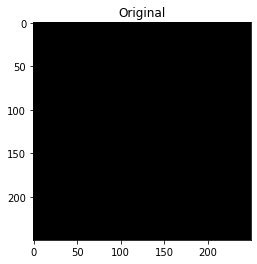

Button(description='Add to Scrapbook', style=ButtonStyle())

Output()

In [ ]:
selected_crop = selected_img[0:250, 0:250]

selected_rotate = rotate_img(selected_crop, 120, 1, rows/2, cols/2)

display_img(selected_rotate)

# Adds the cropped image to the scrapbooking list
display(button, output)

Here's all the cropped images that you created. Choose some x,y coordinates to place them into the canvas!

In [ ]:
display(pin_x, pin_y)

# dropdown to select which img
scrap_dropdown = widgets.Dropdown(
  options=cropped_list,
  description='Cropped Imgs',
  disabled=False,
)
widgets.interact(scrap_list, x=scrap_dropdown)

display(paste_button, paste_output)

IntText(value=25, description='X:')

IntText(value=150, description='Y:')

interactive(children=(Dropdown(description='Cropped Imgs', options=('knight.png', 'knight.png', 'knight.png', …

Button(description='Add to Page', style=ButtonStyle())

Output()

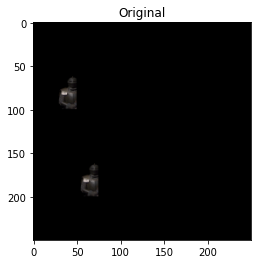

In [ ]:
display_img(canvas)

# **Conclusion**

> Go over what was covered in this chapter <br>
> maybe some short explanation of useful references? for later chapters to reference